In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_file = r"tiny_eeg_self_experiment_reading_music.xls"

In [3]:
excelFile = pd.read_excel(input_file, sheet_name=["Music","Reading"])

df_music = excelFile["Music"]
df_reading = excelFile["Reading"]

In [4]:
print("=========== MUSIC INFO ===========")
print(df_music.info())
print("=========== READING INFO ===========")
print(df_reading.info())

=========== MUSIC INFO ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IndexId   16383 non-null  int64  
 1   Channel1  16383 non-null  float64
 2   Channel2  16383 non-null  float64
 3   Channel3  16383 non-null  float64
 4   Channel4  16383 non-null  float64
 5   Ref1      16383 non-null  int64  
 6   Ref2      16383 non-null  int64  
 7   Ref3      16383 non-null  int64  
 8   TS1       16383 non-null  object 
 9   TS2       16383 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB
None
=========== READING INFO ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IndexId   16383 non-null  int64  
 1   Channel1  16383 non-null  float64
 2   Channel2  1638


## Limpieza de datos

### Dataset Musica

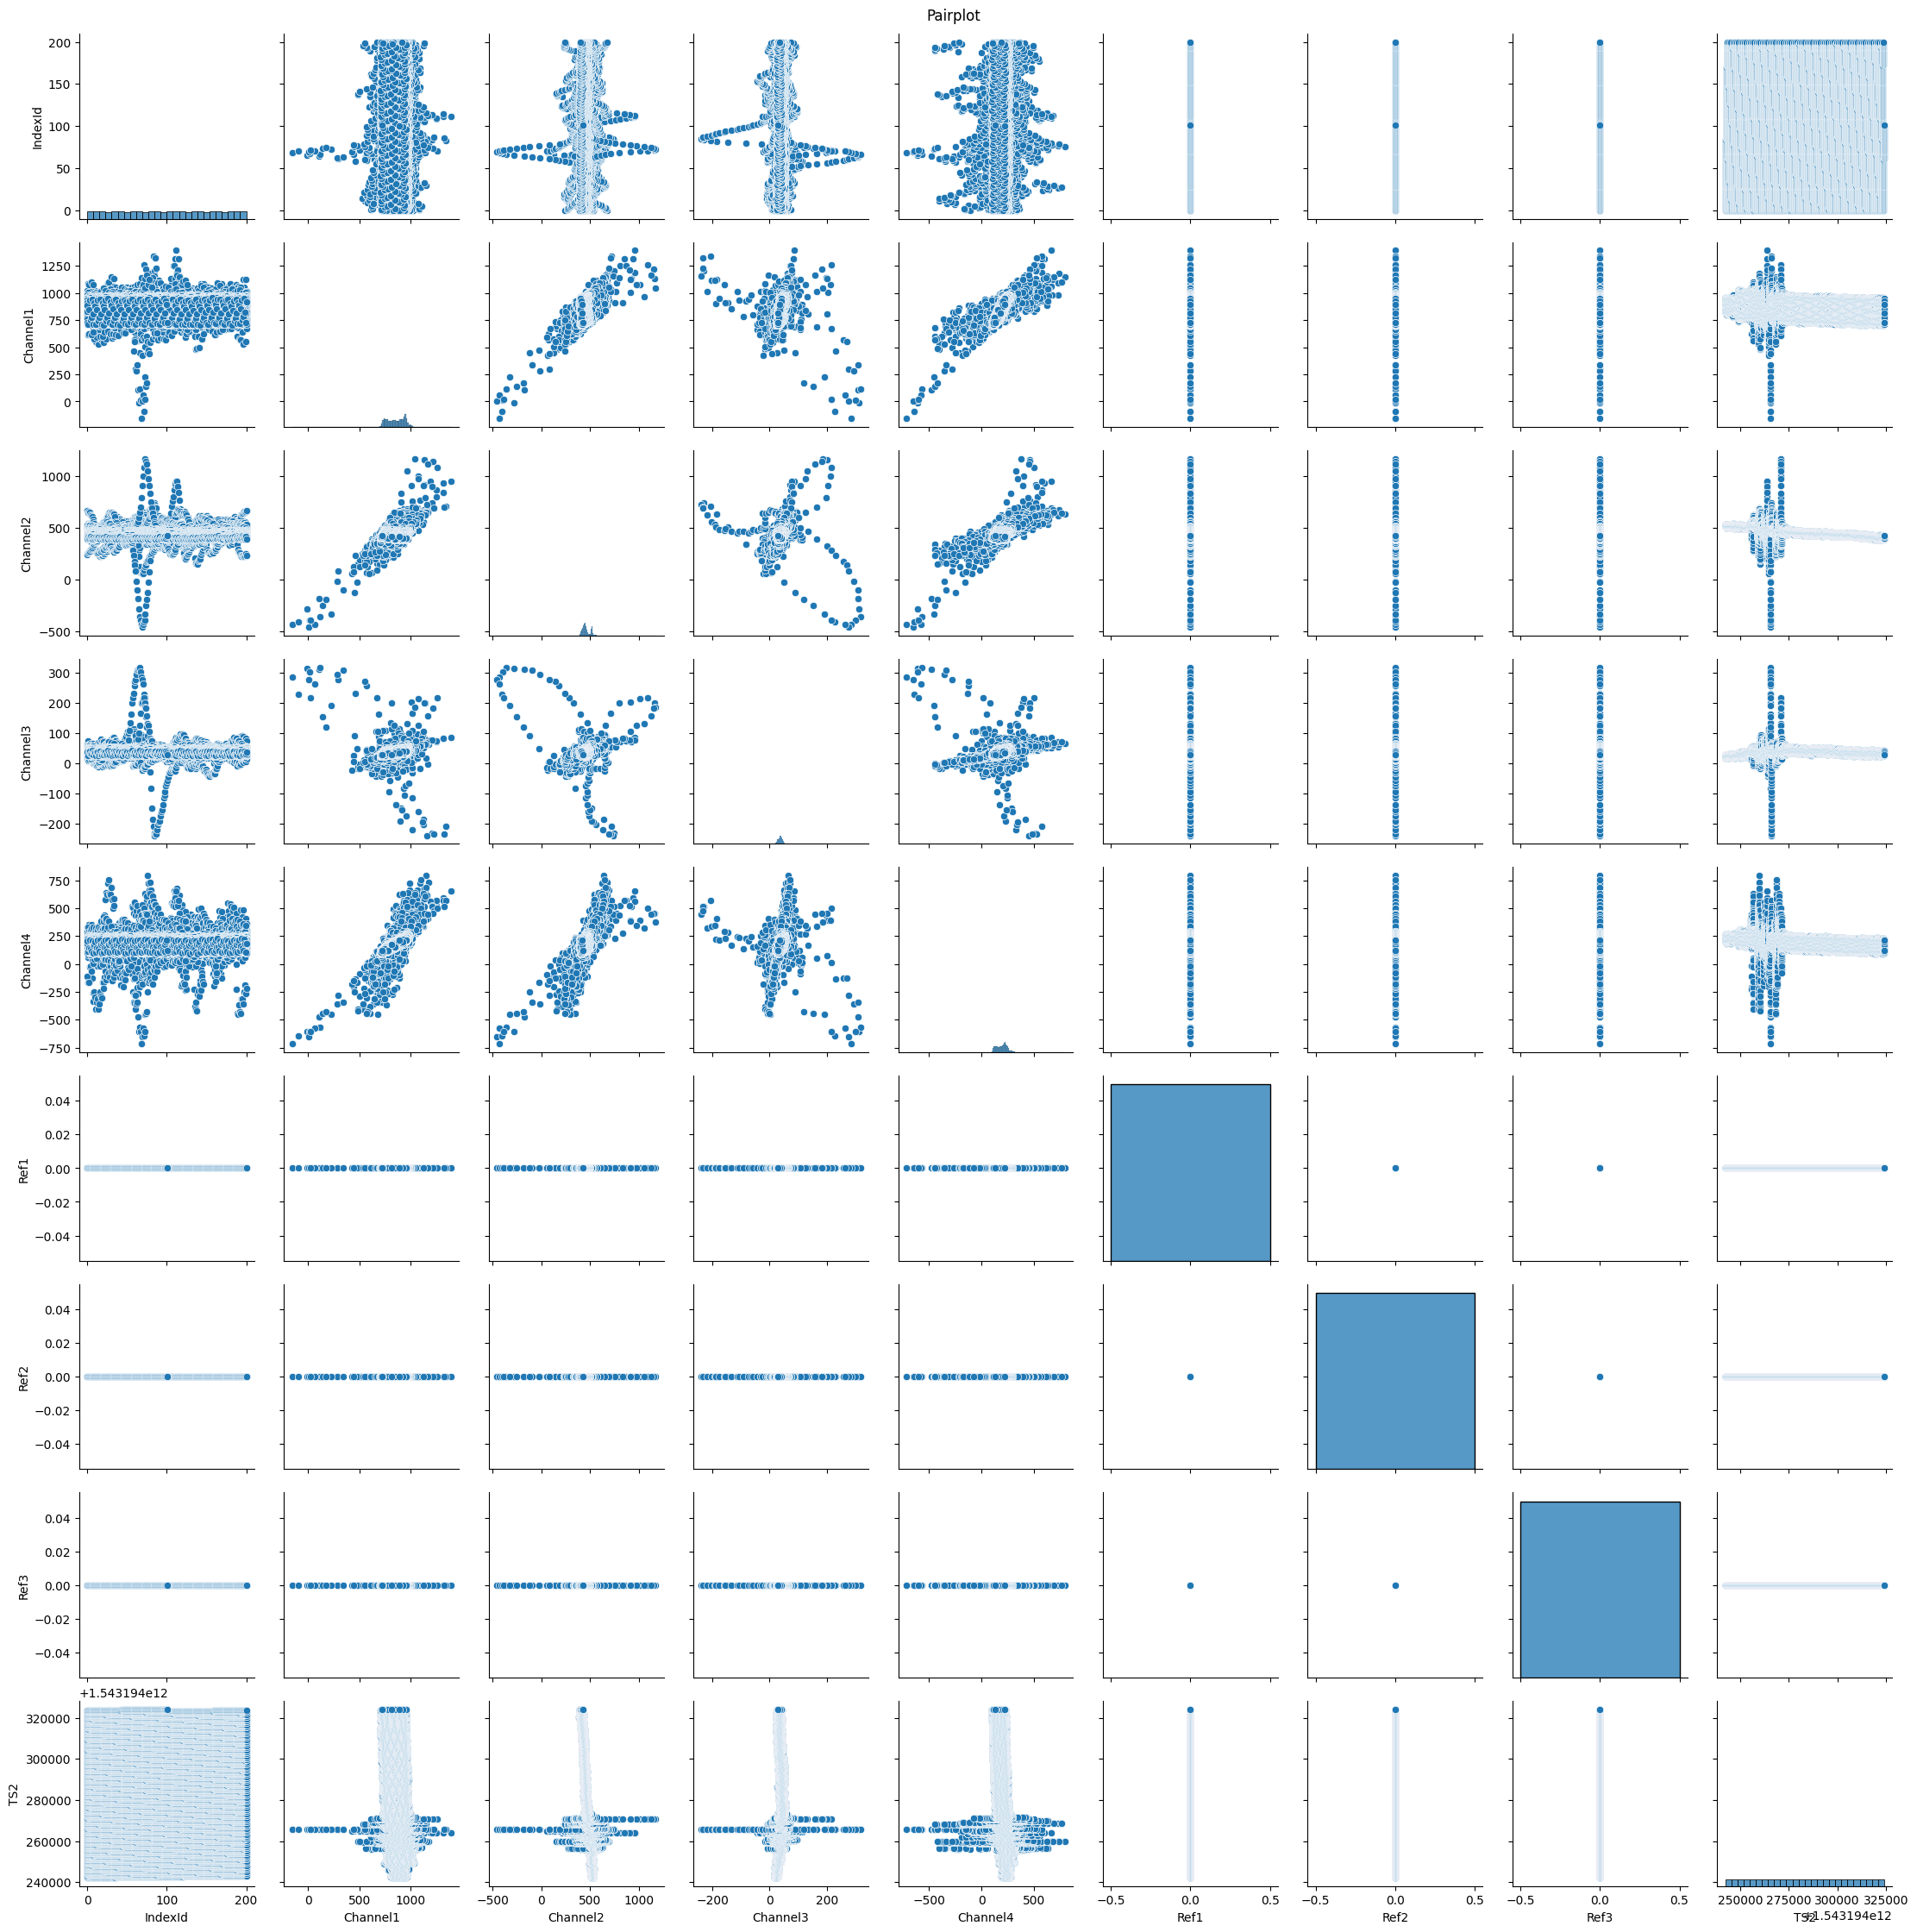

<Figure size 600x500 with 0 Axes>

In [5]:
# Celda (i,j) es un scatter de las variables i y j, mientras que la celda (i,i) es la densidad marginal de i
pairplot = sns.pairplot(df_music.drop_duplicates(), diag_kind="hist")
pairplot.fig.suptitle("Pairplot", y=1)
plt.figure(figsize=(6,5))
plt.show()

In [6]:
df_music = df_music.drop(labels=["IndexId","Ref1","Ref2","Ref3","TS1","TS2"],axis=1)
df_music.head()

,Channel1,Channel2,Channel3,Channel4
0,933.19,519.23,21.71,238.45
1,932.94,516.98,22.70,251.80
2,827.70,521.87,17.26,207.42
3,893.26,519.82,18.90,219.49
4,953.94,520.69,21.88,252.06


In [7]:
len(df_music)

16383

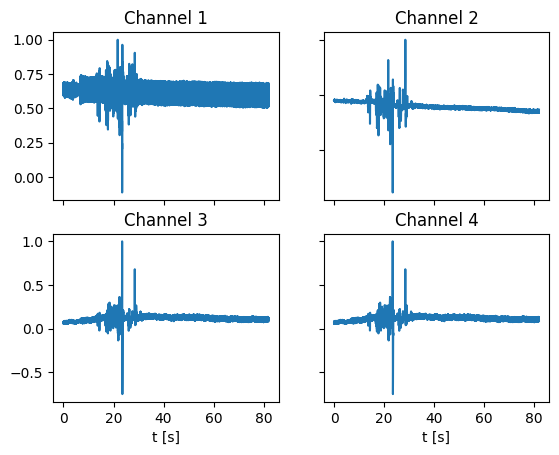

In [8]:
#sampling rate del ganglion board es de 200 Hz
fs = 200
T = 1/fs * len(df_music)
t = np.linspace(0,T,len(df_music))

#Normalizamos los canales

channels = [df_music[f"Channel{i}"] for i in range(1,5)]

[CH1, CH2, CH3, CH4] = channels

CH1 = CH1 / np.max(CH1)
CH2 = CH2 / np.max(CH2)
CH3 = CH3 / np.max(CH3)
CH4 = CH4 / np.max(CH4)

fig, axs = plt.subplots(2,2)

axs[0,0].plot(t, CH1)
axs[0,0].set_title("Channel 1")
axs[0,1].plot(t, CH2)
axs[0,1].set_title("Channel 2")
axs[1,0].plot(t, CH3)
axs[1,0].set_title("Channel 3")
axs[1,1].plot(t, CH3)
axs[1,1].set_title("Channel 4")

for ax in axs.flat:
  ax.set(xlabel="t [s]")

for ax in axs.flat:
  ax.label_outer()


#### Usando FFT

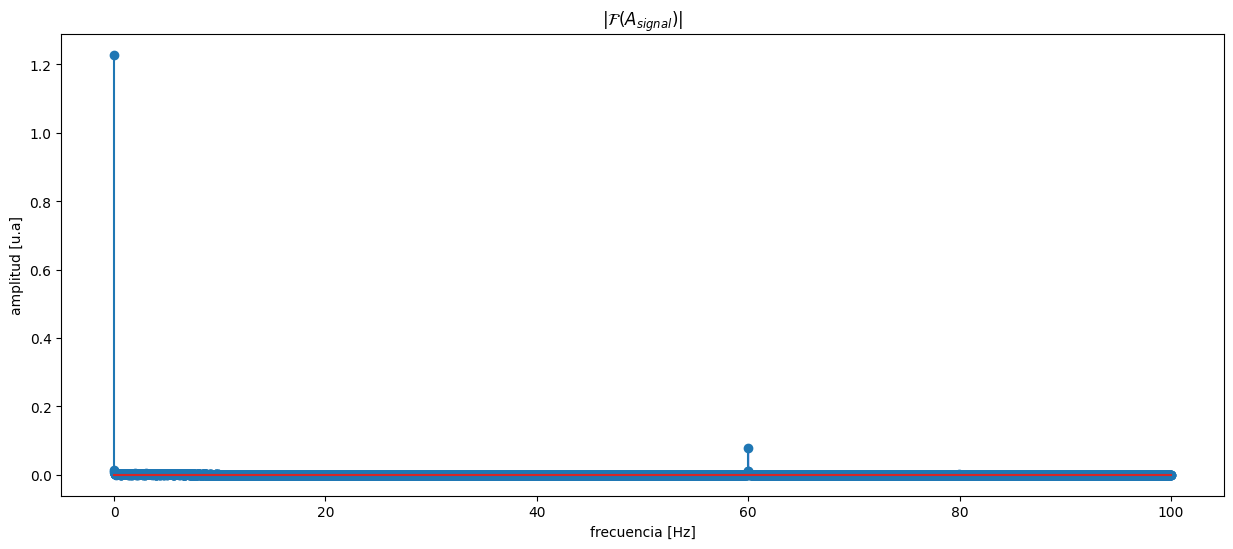

In [9]:
#Limpieza con ft
from numpy.fft import rfft, rfftfreq, irfft

N = len(t)

Wch1 = rfft(CH1) / (N/2)
freq = np.arange(0, N/2) / T

fig=plt.figure(3,figsize=(15,6))
plt.clf()
plt.plot(freq, np.abs(Wch1), lw=1.0, c='b')
plt.stem(freq, np.abs(Wch1))
plt.xlabel("frecuencia [Hz]")
plt.ylabel("amplitud [u.a]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")
plt.show()

In [10]:
Wch1

array([1.22840521e+00+0.00000000e+00j, 3.24072720e-03-1.34606750e-02j,
       9.55566165e-04-9.34666859e-03j, ...,
       9.54980156e-06-8.59787264e-06j, 4.32704254e-05-1.09824609e-05j,
       2.51391495e-05-1.07005230e-05j])

/tmp/ipykernel_301960/1744685578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(np.abs(Wch1),showfliers=True, log_scale=True, orient='h',palette=sns.color_palette("flare"))
/tmp/ipykernel_301960/1744685578.py:2: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(np.abs(Wch1),showfliers=True, log_scale=True, orient='h',palette=sns.color_palette("flare"))


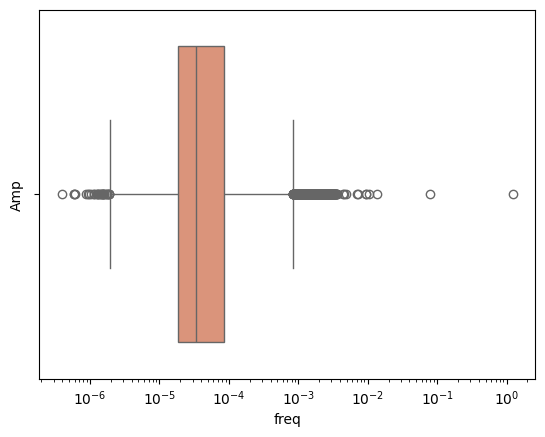

In [11]:
#Busqueda de outliers!
sns.boxplot(np.abs(Wch1),showfliers=True, log_scale=True, orient='h',palette=sns.color_palette("flare"))
plt.xlabel("freq")
plt.ylabel("Amp")
plt.show()

In [12]:
#q1 = np.percentile(np.abs(Wch1), .25)
#q3 = np.percentile(np.abs(Wch1), .75)
#iqr = q3 - q1
#iqr_3_2 = 1.5*iqr
#
#lower_fence = q1 - iqr_3_2
#upper_fence = q3 + iqr_3_2
#
#Wch1 = Wch1[(np.abs(Wch1) >= lower_fence) & (np.abs(Wch1) <= upper_fence)]
#Wch1

In [13]:
#Remover outliers!


#z_scores = sp.stats.zscore(np.abs(Wch1))
#threshold = 3.5
#Wch1 = Wch1[z_scores < threshold]
#
#np.shape(Wch1)

In [14]:
#ploteamos
#n = np.shape(Wch1)[0]
#freq = n * np.linspace(0,1,int(n))
#
#fig=plt.figure(3,figsize=(15,6))
#plt.clf()
#plt.plot(freq, np.abs(Wch1), lw=1.0, c='b')
#plt.stem(freq, np.abs(Wch1))
#plt.xlabel("frecuencia [Hz]")
#plt.ylabel("amplitud [u.a]")
#plt.title(r"$|\mathcal{F}(A_{signal})|$")
#plt.show()

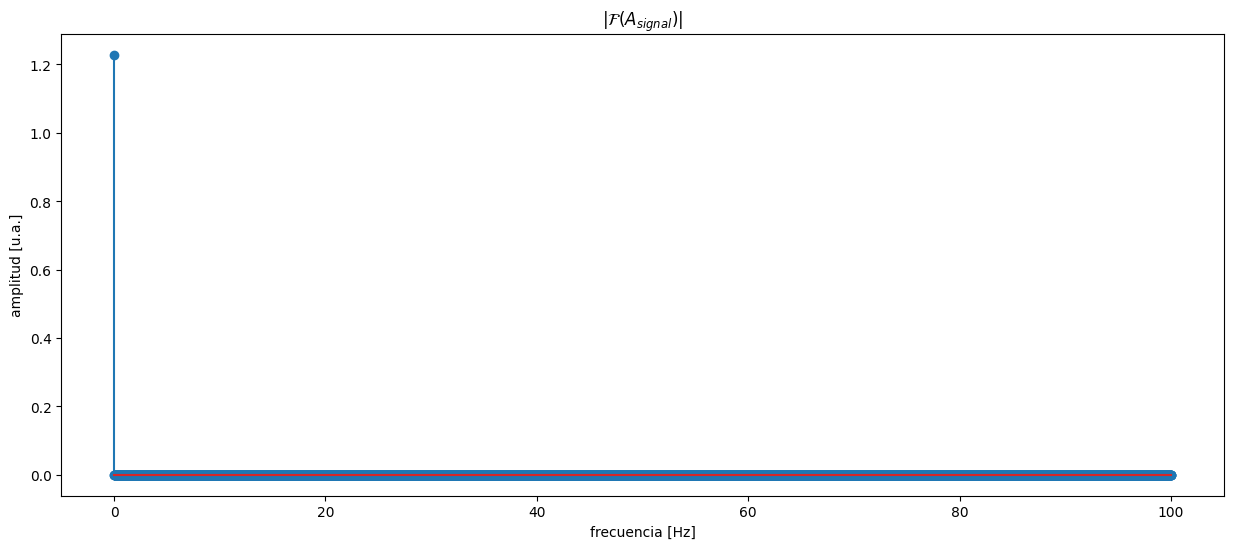

In [15]:
#Filtramos frecuencias altas
Q2 = Wch1 * np.conj(Wch1)

cut = .4
CH1filt = Wch1 * (Q2 > cut)

fig=plt.figure(4, figsize=(15,6))
plt.clf()
plt.plot(freq, np.abs(CH1filt), lw=1.0, c='b')
plt.stem(freq, np.abs(CH1filt))
plt.xlabel("frecuencia [Hz]")
plt.ylabel("amplitud [u.a.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")
plt.show()

In [16]:
#Reconstruimos la señal
recCH1 = irfft(CH1filt)
np.shape(recCH1)[0]


16382

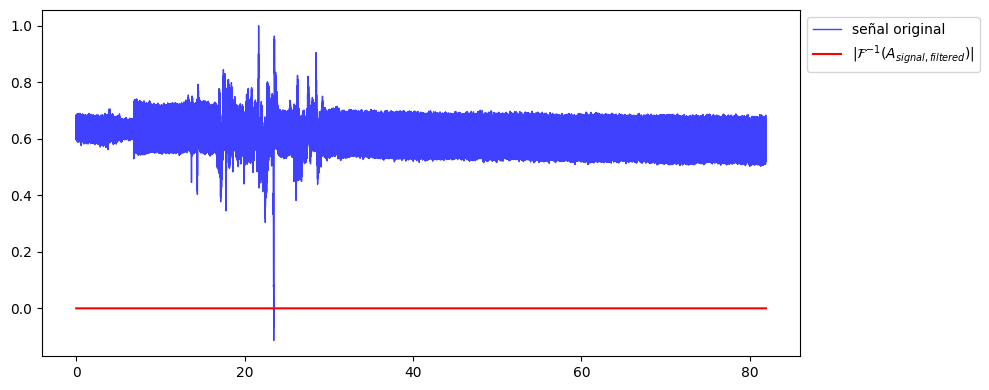

In [17]:
ts = np.linspace(0,T, np.shape(recCH1)[0])
fig=plt.figure(5, figsize=(10,4))
plt.clf()
plt.plot(t, CH1, lw=1, c="b", 
         label="señal original", alpha=0.75)
plt.plot(ts, recCH1,  c='r',
         label="$|\mathcal{F}^{-1}(A_{signal, filtered})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

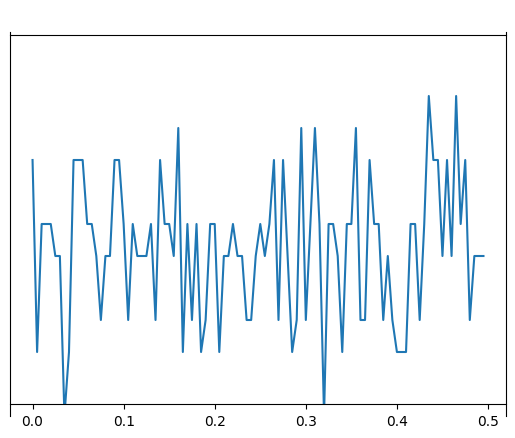

In [18]:
#Close up

CH1_close = recCH1[0:100]
ts = ts[:100]

ylim = (np.min(CH1_close), np.max(CH1_close)+1e-20)
plt.plot(ts, CH1_close)
plt.ylim(ylim)
plt.show()

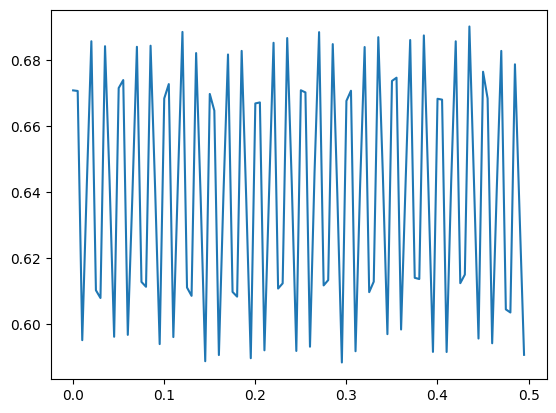

In [19]:
#mismo segmento de la señal original
Ch1_or_closeup = CH1[:100]
t_cu = t[:100]
plt.plot(t_cu,Ch1_or_closeup)
plt.show()

#### Usando STFT

In [20]:
from scipy.signal import stft, istft
from scipy.signal.windows import boxcar, triang, gaussian

M = int(len(CH1)/7)

##### Ventana boxcar

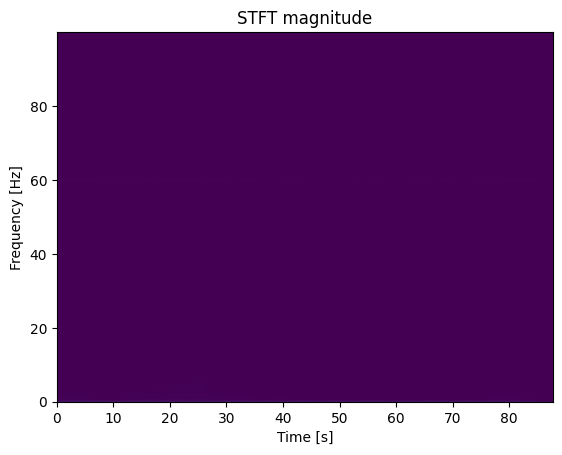

In [21]:
w = boxcar(M)
f, ts, STFT = stft(CH1, fs=fs, window=w,nperseg=len(w), nfft=len(CH1),return_onesided=True)
plt.pcolormesh(ts,f, np.abs(STFT),shading='gouraud')
plt.title("STFT magnitude")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.show()